In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df = pd.read_csv('/Users/mystery-1223/Desktop/Covid19AnalysisIndiaWorld/494724-1261242-bundle-archive/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.shape

(45179, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45179 entries, 0 to 45178
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              45179 non-null  int64  
 1   ObservationDate  45179 non-null  object 
 2   Province/State   26150 non-null  object 
 3   Country/Region   45179 non-null  object 
 4   Last Update      45179 non-null  object 
 5   Confirmed        45179 non-null  float64
 6   Deaths           45179 non-null  float64
 7   Recovered        45179 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.8+ MB


In [7]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

df['Last Update'] = pd.to_datetime(df['Last Update'])

df['Confirmed'] = df['Confirmed'].astype('int')

df['Deaths'] = df['Deaths'].astype('int')

df['Recovered'] = df['Recovered'].astype('int')

In [8]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


In [25]:
from datetime import date
recent = df[['ObservationDate']][-1:].max()

df_update = df.loc[df.ObservationDate< pd.Timestamp(recent['ObservationDate'])]

df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
...,...,...,...,...,...,...,...,...
44445,44446,2020-06-17,Zacatecas,Mexico,2020-06-18 04:33:18,580,66,347
44446,44447,2020-06-17,Zakarpattia Oblast,Ukraine,2020-06-18 04:33:18,1808,46,745
44447,44448,2020-06-17,Zaporizhia Oblast,Ukraine,2020-06-18 04:33:18,538,16,366
44448,44449,2020-06-17,Zhejiang,Mainland China,2020-06-18 04:33:18,1269,1,1267


In [26]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     19029
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [27]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [28]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
0,1,2020-01-22,Anhui,China,2020-01-22 17:00:00,1,0,0,31,43
1,2,2020-01-22,Beijing,China,2020-01-22 17:00:00,14,0,0,77,43
2,3,2020-01-22,Chongqing,China,2020-01-22 17:00:00,6,0,0,161,43
3,4,2020-01-22,Fujian,China,2020-01-22 17:00:00,1,0,0,250,43
4,5,2020-01-22,Gansu,China,2020-01-22 17:00:00,0,0,0,259,43


In [30]:
df.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

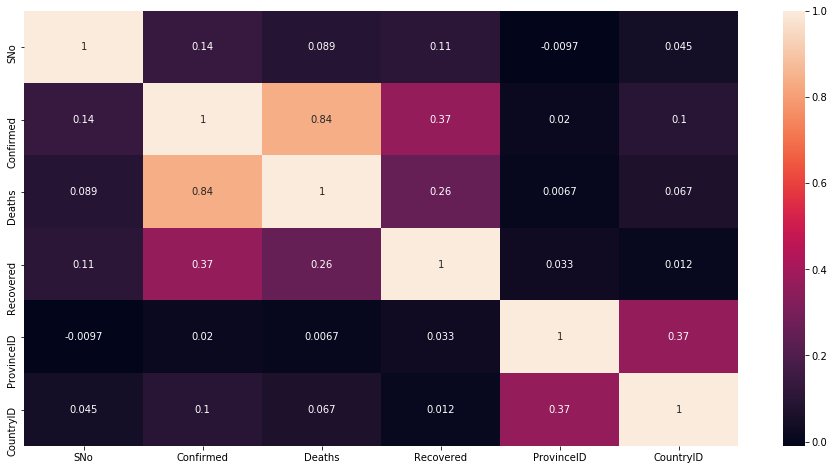

In [33]:
plt.figure(figsize=(16,8))
corr= df_update.corr()
sns.heatmap(corr,annot=True)

In [34]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales